We are able to statistically analyze text data by vectorizing the words in a document.

Using vectors of words, we can assess their similarity by calculating their cosine similarity score.

Further, we can use Term Frequency - Inverse Document Frequency (TF-IDF) scores to understand how many times a word or phrase appears in a document versus how much it appears in a collection of documents (corpus).

IDF(t) = log(D/t) where D = number of documents and t = number of documents where term appears

In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\casey\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
import os
os.chdir('C:\\Users\\casey\\Downloads\\Python-Data-Science-and-Machine-Learning-Bootcamp-master\\Machine Learning Sections\\Natural-Language-Processing\\smsspamcollection')

In [4]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
messages[0] # we can see there are tab separators - can use pandas to decompose

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
import pandas as pd

In [9]:
messages = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label', 'message'])

In [10]:
# explore data

messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
# create new column with length of message

messages['length'] = messages['message'].apply(len)

In [14]:
messages.head() # worked fine

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

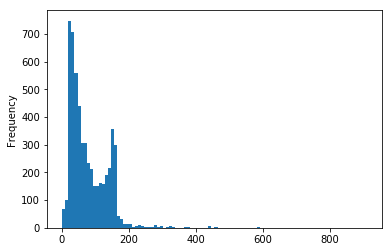

In [18]:
messages['length'].plot.hist(bins = 100) # bimodal distribution with some outliers

In [19]:
messages['length'].describe() # max of 910 is far out there compared to most texts

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [21]:
# lets see the long message

messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C67C2330B8>,
      dtype=object)

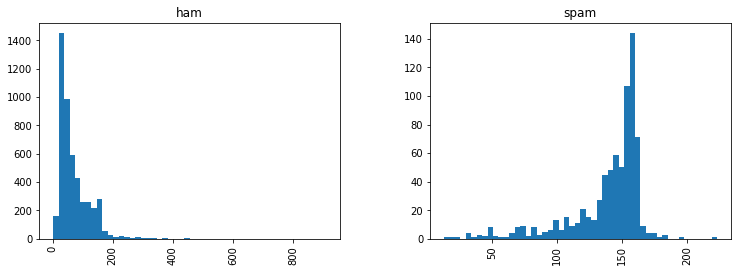

In [24]:
# weird love letter lol
# make subplots using alternative method with matplotlib

messages.hist(column = 'length', by = 'label', figsize = (12, 4), bins = 50)

In [25]:
# text preprocessing
# create function to split messages into individual words

import string

In [26]:
# sample message to show how it works

mess = 'Sample Message! Note: it has punctuation.'

In [27]:
no_punc = [c for c in mess if c not in string.punctuation]

In [28]:
no_punc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [29]:
from nltk.corpus import stopwords

In [30]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
# join elements in a list together

no_punc = ''.join(no_punc)

In [32]:
no_punc # back to original form with no punctuation

'Sample Message Note it has punctuation'

In [33]:
# another join example

x = ['a', 'b', 'c', 'd', 'e']

In [34]:
''.join(x)

'abcde'

In [35]:
# we can use pretty much anything for the separators

'+++'.join(x)

'a+++b+++c+++d+++e'

In [36]:
# back to no punc - showing split

no_punc.split()

['Sample', 'Message', 'Note', 'it', 'has', 'punctuation']

In [37]:
# remove stop words to create a clean version of the message

clean_message = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [38]:
clean_message

['Sample', 'Message', 'Note', 'punctuation']

In [39]:
# convert this process into a function

def text_process(mess):
    '''
    1. remove punctuation
    2. remove stop words 
    3. return list of clean text words
    '''
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if nopunc.lower() not in stopwords.words('english')]

In [40]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [41]:
# tokenization using the newly built function - showing first 5 entries

messages['message'].head(5).apply(text_process)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, he, goes, to, usf, he, l...
Name: message, dtype: object

In [42]:
# Normally we would stem words by now, but it is not necessary or very helpful with this dataset

# 3 main steps for bag of words model:
# count how many times word appears
# weigh counts so that frequent words get lower weights
# normalize vectors to unit length to abstract from original text length (L2 Norm)

In [43]:
# using CountVectorizer to create sparse matrix of term counts in each message

from sklearn.feature_extraction.text import CountVectorizer

In [44]:
# analyzer is previously created function

bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [45]:
# print total number of vocab words

print(len(bow_transformer.vocabulary_))

11747


In [46]:
mess4 = messages['message'][3]

In [47]:
print(mess4)

U dun say so early hor... U c already then say...


In [48]:
bow4 = bow_transformer.transform([mess4])

In [49]:
print(bow4) # only returns position where words exist

  (0, 4221)	2
  (0, 4828)	1
  (0, 5476)	1
  (0, 6427)	1
  (0, 6447)	1
  (0, 7427)	1
  (0, 9832)	2
  (0, 10174)	1
  (0, 10703)	1


In [50]:
print(bow4.shape)

(1, 11747)


In [51]:
# checking out underlying words for ones that appear twice

bow_transformer.get_feature_names()[4221]

'U'

In [52]:
bow_transformer.get_feature_names()[9832]

'say'

In [53]:
messages_bow = bow_transformer.transform(messages['message'])

In [54]:
print('Shape of Sparse Matrix:', messages_bow.shape)

Shape of Sparse Matrix: (5572, 11747)


In [55]:
messages_bow.nnz # number of non-zero occurrences

79463

In [56]:
sparsity = messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])
print('sparsity: {}'.format(sparsity))

sparsity: 0.0012140229049026035


In [58]:
# moving onto TF-IDF transformer

from sklearn.feature_extraction.text import TfidfTransformer

In [59]:
# fit transformer to the bag of words

tfidftransformer = TfidfTransformer().fit(messages_bow)

In [60]:
# using fourth message as an example

tfidf4 = tfidftransformer.transform(bow4)

In [61]:
print(tfidf4)

  (0, 10703)	0.2214828525636521
  (0, 10174)	0.19345051326676527
  (0, 9832)	0.5147493130794172
  (0, 7427)	0.41952836023632145
  (0, 6447)	0.3046289560740644
  (0, 6427)	0.28629349827015765
  (0, 5476)	0.2841540501592932
  (0, 4828)	0.25442769469153637
  (0, 4221)	0.3902711884065556


In [62]:
# check idf of a particular word - let's look at university

tfidftransformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [63]:
# transform all messages into tf-idf

messages_tfidf = tfidftransformer.transform(messages_bow)

In [64]:
# using Naive Bayes classifier on tf-idf data

from sklearn.naive_bayes import MultinomialNB

In [65]:
# create spam detection model

spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [66]:
# predict on fourth message in data

spam_detect_model.predict(tfidf4)[0]

'ham'

In [67]:
messages['label'][3] # got it right

'ham'

In [68]:
# predict all classes

all_pred = spam_detect_model.predict(messages_tfidf)

In [69]:
# note that we did not adhere to best practices by using all data for training (should train and test on diff data)
# use train test split to break up datasets

from sklearn.cross_validation import train_test_split

In [70]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)

In [71]:
# instead of repeating every step we did previously, we are going to use sklearn's pipeline feature
# this will save us a lot of time and should be used for all tf-idf stuff in the future

from sklearn.pipeline import Pipeline

In [72]:
# create object and pass in a list of everything we want to do
# pass in tuples with name of step and then the function

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [73]:
# fit pipeline with training data

pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001C67C35C840>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [75]:
# predict on testing data

pred = pipeline.predict(msg_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(label_test, pred)) # about 95% correct - pretty good

             precision    recall  f1-score   support

        ham       0.94      1.00      0.97      1449
       spam       1.00      0.59      0.74       223

avg / total       0.95      0.95      0.94      1672



In [78]:
# another classifier with random forest

from sklearn.ensemble import RandomForestClassifier

In [79]:
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [80]:
pipeline2.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001C67C35C840>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [81]:
pred2 = pipeline2.predict(msg_test)

In [82]:
print(classification_report(label_test, pred2)) # slightly better

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1449
       spam       1.00      0.70      0.82       223

avg / total       0.96      0.96      0.96      1672

